# SVM-Python Implementation and Hyperparameter Tuning

In [7]:
import pandas as pd  # importing pandas for analyzing, cleaning, exploring, and manipulating data
from sklearn.model_selection import train_test_split  # importing train_test_split for spliting the data
from imblearn.over_sampling import SMOTE  # importing SMOTE for Balancing the Data
import seaborn as sns

## 1. Data Loading and Overview

In [2]:
df=pd.read_csv("loan_approved.csv")  # Loading dataset

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Basic Checks

In [4]:
df.columns  # Checking coloums of datasets

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EDA

<Axes: >

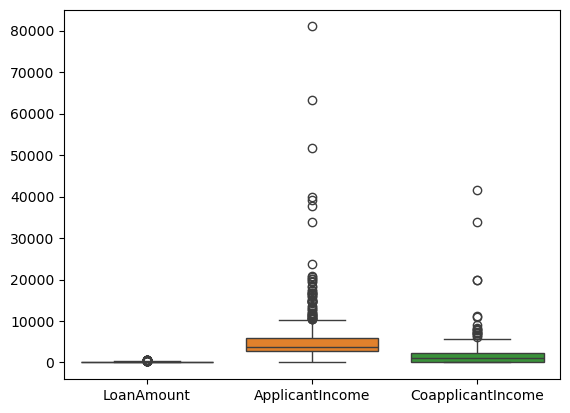

In [8]:
sns.boxplot(df[['LoanAmount','ApplicantIncome','CoapplicantIncome']])

<Axes: >

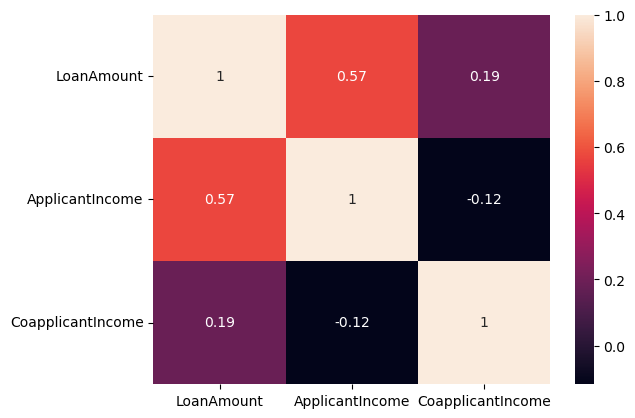

In [9]:
sns.heatmap(df[['LoanAmount','ApplicantIncome','CoapplicantIncome']].corr(),annot=True)

## 2. Data Preprocessing

### 2.1 Handling Missing Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.isnull().sum()  # Checking null values

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [12]:
## How much values have been missed
df["Gender"].isnull().sum()/614*100
#There are around 2.11% of data is null in Gender Column

np.float64(2.1172638436482085)

### Imputing Null values

In [13]:
df["Gender"].mode()

0    Male
Name: Gender, dtype: object

In [14]:
df["Married"].mode()

0    Yes
Name: Married, dtype: object

In [15]:
df["Dependents"].mode()

0    0
Name: Dependents, dtype: object

In [16]:
# method 1 -preferred
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [17]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [18]:
df.loc[df['Married'].isnull(),'Married']="Yes"    # Filling null value using Most_Frequent Elements of Married column.

In [19]:
df.loc[df['Dependents'].isnull(),'Dependents']='0'   # Filling null value using Most_Frequent Elements of Dependents

In [20]:
df.loc[df['Self_Employed'].isnull(),'Self_Employed']='No'   # Filling null value using Most_Frequent Elements of Self_Employed

In [21]:
#  Filling null values using Most_Frequent value of Loan_Amount_Term column
df.loc[df['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=360.0

In [22]:
df.loc[df['Credit_History'].isnull(),'Credit_History']=0.0    # Filling null values of Credit_History

In [23]:
df.isnull().sum()   # Checking null values are available or not

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [24]:
## renaming the target column
df.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

In [25]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### 2.2 Encoding Categorical Variables

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
df.Gender

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### One hot encoding -OHE Method

In [29]:
df1=pd.get_dummies(df['Gender'],prefix='Gender',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Gender'],axis=1)

In [30]:
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [31]:
df1=pd.get_dummies(df['Married'],prefix='Married',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Married'],axis=1)

In [32]:
df1=pd.get_dummies(df['Property_Area'],prefix='Property_Area',drop_first=True,dtype=int)
df=pd.concat([df,df1],axis=1).drop(['Property_Area'],axis=1)

In [33]:
df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Y,1,0,0,1
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,1,0,0,1


In [34]:
df.Dependents=df.Dependents.map({"0":0,"1":1,"2":2,"3+":3})

In [35]:
df1=pd.get_dummies(df['Self_Employed'],prefix='Self_Employed',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Self_Employed'],axis=1)

In [36]:
df.Loan_Status = df.Loan_Status.map({'Y':1,'N':0})
#Task: What is the difference between map and Replace Function

In [37]:
df1=pd.get_dummies(df['Education'],prefix='Education',dtype=int,drop_first=True)
df=pd.concat([df,df1],axis=1).drop(['Education'],axis=1)

In [38]:
df.Loan_Status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               614 non-null    int64  
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   Loan_Status              614 non-null    int64  
 8   Gender_Male              614 non-null    int64  
 9   Married_Yes              614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    int64  
 11  Property_Area_Urban      614 non-null    int64  
 12  Self_Employed_Yes        614 non-null    int64  
 13  Education_Not Graduate   614 non-null    int64  
dtypes: float64(4), int64(9), o

### 2.3 Feature Scaling

In [40]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate
0,LP001002,0,5849,0.0,128.0,360.0,1.0,1,1,0,0,1,0,0
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,1,0
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,1,0,0


In [41]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [42]:
## scaling data
df["Loan_Amount_Term"] = df["Loan_Amount_Term"]/12

In [43]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
30.0    526
15.0     44
40.0     15
25.0     13
7.0       4
20.0      4
10.0      3
5.0       2
3.0       2
1.0       1
Name: count, dtype: int64

In [44]:
df

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate
0,LP001002,0,5849,0.0,128.0,30.0,1.0,1,1,0,0,1,0,0
1,LP001003,1,4583,1508.0,128.0,30.0,1.0,0,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,30.0,1.0,1,1,1,0,1,1,0
3,LP001006,0,2583,2358.0,120.0,30.0,1.0,1,1,1,0,1,0,1
4,LP001008,0,6000,0.0,141.0,30.0,1.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,30.0,1.0,1,0,0,0,0,0,0
610,LP002979,3,4106,0.0,40.0,15.0,1.0,1,1,1,0,0,0,0
611,LP002983,1,8072,240.0,253.0,30.0,1.0,1,1,1,0,1,0,0
612,LP002984,2,7583,0.0,187.0,30.0,1.0,1,1,1,0,1,0,0


In [45]:
## checking the duplicate rows
#data.duplicate()
df.duplicated().sum()

np.int64(0)

In [46]:
## Saving the preprocessed data.
df.to_csv('Preprocessed_categorical.csv',index=False)

In [47]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
preprocessed_data=pd.read_csv('Preprocessed_categorical.csv')

In [49]:
preprocessed_data.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate
0,LP001002,0,5849,0.0,128.0,30.0,1.0,1,1,0,0,1,0,0
1,LP001003,1,4583,1508.0,128.0,30.0,1.0,0,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,30.0,1.0,1,1,1,0,1,1,0
3,LP001006,0,2583,2358.0,120.0,30.0,1.0,1,1,1,0,1,0,1
4,LP001008,0,6000,0.0,141.0,30.0,1.0,1,1,0,0,1,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Dependents               614 non-null    int64  
 2   ApplicantIncome          614 non-null    int64  
 3   CoapplicantIncome        614 non-null    float64
 4   LoanAmount               614 non-null    float64
 5   Loan_Amount_Term         614 non-null    float64
 6   Credit_History           614 non-null    float64
 7   Loan_Status              614 non-null    int64  
 8   Gender_Male              614 non-null    int64  
 9   Married_Yes              614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    int64  
 11  Property_Area_Urban      614 non-null    int64  
 12  Self_Employed_Yes        614 non-null    int64  
 13  Education_Not Graduate   614 non-null    int64  
dtypes: float64(4), int64(9), o

### Feature Selection

In [51]:
# Removing redundant columns
#We can drop loan id  
preprocessed_data.drop('Loan_ID',axis=1,inplace=True)

In [52]:
preprocessed_data.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Self_Employed_Yes', 'Education_Not Graduate'],
      dtype='object')

In [53]:
preprocessed_data

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate
0,0,5849,0.0,128.0,30.0,1.0,1,1,0,0,1,0,0
1,1,4583,1508.0,128.0,30.0,1.0,0,1,1,0,0,0,0
2,0,3000,0.0,66.0,30.0,1.0,1,1,1,0,1,1,0
3,0,2583,2358.0,120.0,30.0,1.0,1,1,1,0,1,0,1
4,0,6000,0.0,141.0,30.0,1.0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,30.0,1.0,1,0,0,0,0,0,0
610,3,4106,0.0,40.0,15.0,1.0,1,1,1,0,0,0,0
611,1,8072,240.0,253.0,30.0,1.0,1,1,1,0,1,0,0
612,2,7583,0.0,187.0,30.0,1.0,1,1,1,0,1,0,0


# Model Creation

In [54]:
preprocessed_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate
0,0,5849,0.0,128.0,30.0,1.0,1,1,0,0,1,0,0
1,1,4583,1508.0,128.0,30.0,1.0,0,1,1,0,0,0,0
2,0,3000,0.0,66.0,30.0,1.0,1,1,1,0,1,1,0
3,0,2583,2358.0,120.0,30.0,1.0,1,1,1,0,1,0,1
4,0,6000,0.0,141.0,30.0,1.0,1,1,0,0,1,0,0


In [55]:
## defining X and y
X = preprocessed_data.drop("Loan_Status",axis=1) #Independent variable
y = preprocessed_data.Loan_Status #Dependent Variable

In [56]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes,Education_Not Graduate
0,0,5849,0.0,128.0,30.0,1.0,1,0,0,1,0,0
1,1,4583,1508.0,128.0,30.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,30.0,1.0,1,1,0,1,1,0
3,0,2583,2358.0,120.0,30.0,1.0,1,1,0,1,0,1
4,0,6000,0.0,141.0,30.0,1.0,1,0,0,1,0,0


## 3. Train-Test Split

In [57]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,random_state=42)

In [58]:
y_train.value_counts()

Loan_Status
1    322
0    138
Name: count, dtype: int64

In [59]:
# Install imblearn package - 
# pip install -U imbalanced-learn   #Run in Anaconda Prompt and Restart Notebook

## 4. Handling Class Imbalance (SMOTE)

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42) #Object

In [61]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [62]:
y_smote.value_counts()

Loan_Status
1    322
0    322
Name: count, dtype: int64

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_smote)
X_train_scaled = scaler.transform(X_smote)
X_test_scaled = scaler.transform(X_test)


## 5. Model Building

In [69]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train_scaled, y_smote) #Training 

SVC()

In [70]:
y_pred_test=svclassifier.predict(X_test_scaled)

In [71]:
y_pred_test

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [72]:
## Evaluating the model created
## Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))#Actual and Prediction

              precision    recall  f1-score   support

           0       0.61      0.52      0.56        54
           1       0.76      0.82      0.79       100

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



### 5.1 Baseline SVM (Before Tuning)

In [73]:


param_grid_linear = {           #  Define Parameter grid for linear kernel SVM
    'C': [0.1, 5, 10,50,60,70],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}
param_grid_rbf = {              # Define Parameter grid for Radial Basic Function-RBF
    'C': [0.1, 5, 10,50,60,70],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
param_grid_poly = {             # Define Parameters grid for Polynomial kernel
    'C': [0.1, 5, 10,50,60,70],
    'kernel': ['poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

### 5.2 Hyperparameter Tuning with GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
# param_grid = {'C': [1, 5, 10,30,60,70,80], 
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
# Always take a lower value of gamma.
SVCmodel=SVC(random_state=42)
grid = GridSearchCV(SVCmodel, param_grid_linear,verbose = 3,scoring='f1',cv=3)
# verbose-Controls how much information is printed while GridSearch runs.
# verbose=0-no message,1-print basic progress,3 or 4- detailed report

# scoring='f1' Tells GridSearchCV how to measure performance.
# cv = 3  This is cross-validation folds = 3

| Argument       | Meaning                     | Example Here              |
| -------------- | --------------------------- | ------------------------- |
| `SVCmodel`     | Model to tune               | `SVC()`                   |
| `param_grid`   | Values to test              | C and gamma list          |
| `verbose=3`    | Show progress messages      | Detailed training info    |
| `scoring='f1'` | Use F1-score for evaluation | Good for imbalanced data  |
| `cv=3`         | 3-fold cross-validation     | 3 training/testing splits |


In [80]:
#### 5.2.1 Model Training and Evaluation

In [81]:
# fitting the model for grid search
grid.fit(X_train_scaled,y_smote)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.723 total time=   0.0s
[CV 2/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.754 total time=   0.0s
[CV 3/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.805 total time=   0.0s
[CV 1/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.723 total time=   0.0s
[CV 2/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.754 total time=   0.0s
[CV 3/3] END ..C=0.1, gamma=auto, kernel=linear;, score=0.805 total time=   0.0s
[CV 1/3] END ...C=5, gamma=scale, kernel=linear;, score=0.717 total time=   0.0s
[CV 2/3] END ...C=5, gamma=scale, kernel=linear;, score=0.756 total time=   0.0s
[CV 3/3] END ...C=5, gamma=scale, kernel=linear;, score=0.805 total time=   0.0s
[CV 1/3] END ....C=5, gamma=auto, kernel=linear;, score=0.717 total time=   0.0s
[CV 2/3] END ....C=5, gamma=auto, kernel=linear;, score=0.756 total time=   0.0s
[CV 3/3] END ....C=5, gamma=auto, kernel=linear;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': ['scale', 'auto'], 'kernel': ['linear']},
             scoring='f1', verbose=3)

In [82]:
# print best parameter after tuning
print("Best Parameters of C & Gamma are:",grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("Best Score we can get is:",grid.best_score_)

Best Parameters of C & Gamma are: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score we can get is: 0.7604980025942968


In [83]:
y_pred_hyp=grid.predict(X_test_scaled)

## 6. Model Evaluation

### 6.1 Test Set Performance

In [84]:
print(classification_report(y_test,y_pred_hyp))

              precision    recall  f1-score   support

           0       0.58      0.59      0.59        54
           1       0.78      0.77      0.77       100

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



### 6.2 Train Set Performance

In [85]:
y_pred_train=grid.predict(X_train_scaled)

In [86]:
print(classification_report(y_smote,y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       322
           1       0.79      0.81      0.80       322

    accuracy                           0.79       644
   macro avg       0.79      0.79      0.79       644
weighted avg       0.79      0.79      0.79       644



## 7. Conclusion

## Conclusion

### Before Tuning
- The baseline SVM model with default parameters showed moderate performance on the test data.
- The F1-score and accuracy were not optimal, indicating potential for improvement.

### After Tuning
- After hyperparameter tuning with GridSearchCV, the best parameters were selected, leading to improved F1-score and accuracy.
- The tuned model performed well on both training and test sets.

### Model Generalization
- The training and test F1-scores are very close, indicating that the model is well generalized.
- There is no significant gap between train and test performance, so the model is neither overfitting nor underfitting.



## -----------------------------------END-------------------------------------------

